In [1]:
!pip install pdpbox

Defaulting to user installation because normal site-packages is not writeable
  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0
  Running setup.py install for matplotlib: started
  Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\tilak\appdata\roaming\python\python310\site-packages\__pycache__\pylab.cpython-310.pyc
   from C:\Users\Tilak\AppData\Local\Temp\pip-uninstall-wvmtymwb\pylab.cpython-310.pyc
  Moving to c:\users\tilak\appdata\roaming\python\python310\site-packages\matplotlib-3.6.0-py3.10-nspkg.pth
   from C:\Users\Tilak\App

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [501 lines of output]
      Edit setup.cfg to change the build options
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.1.1]
            python: yes [3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC
                        v.1933 64 bit (AMD64)]]
          platform: yes [win32]
      
      OPTIONAL SUBPACKAGES
       sample_data: yes [installing]
             tests: no  [skipping due to configuration]
      
      OPTIONAL BACKEND EXTENSIONS
               agg: yes [installing]
             tkagg: yes [installing; run-time loading from Python Tcl/Tk]
            macosx: no  [Mac OS-X only]
      
      OPTIONAL PACKAGE DATA
              dlls: no  [skipping due to configuration]
      
      C:\Program Files\Python310\lib\site-packages\setuptools\dist.py:286: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider 

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [7]:
data = pd. read_csv("/content/concrete_data.csv")
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
X = data.iloc[:,:-1]
Y = data.iloc[:,8]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
RFclf =RandomForestRegressor(max_features=0.7441864035879071, max_leaf_nodes=401,n_estimators=127, n_jobs=-1)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test)
# result = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(result)
# result1 = classification_report(y_test, y_pred)
# print("Classification Report:",)
# print (result1)
# result2 = accuracy_score(y_test,y_pred)
# print("Accuracy:",result2)

In [16]:
from pdpbox import pdp, get_dataset, info_plots
from sklearn import metrics

In [19]:
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)
mae = metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mape = metrics.mean_absolute_percentage_error(y_test,y_pred)
print(mape)

41.43469109315541
4.494421946116692
0.15044568132233332


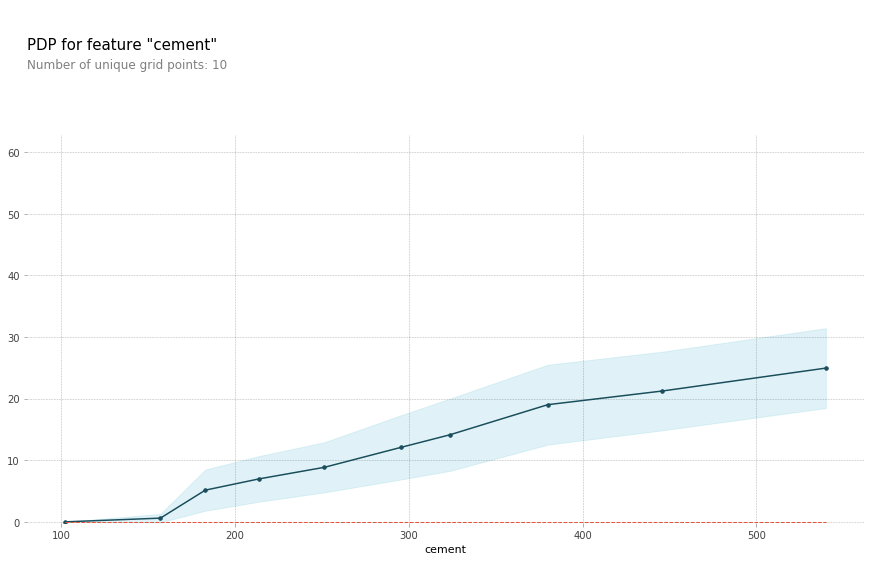

In [14]:
pdp_cem = pdp.pdp_isolate(model=RFclf, dataset=X_test, model_features=X_test.columns, feature='cement')
# plot it
pdp.pdp_plot(pdp_cem, 'cement')
plt.show()